# The NDDataset object

The NDDataset is the main object use by **SpectroChemPy**. 

Like numpy ndarrays, NDDataset have the capability to be sliced, sorted and subject to matematical operations. 

But, in addition, NDDataset may have units, can be masked and each dimensions can have coordinates also with units. This make NDDataset aware of unit compatibility, *e.g.*, for binary operation such as addtions or subtraction or during the application of mathematical operations. In addition or in replacement of numerical data for coordinates, NDDatset can also have labeled coordinates where labels can be different kind of objects (strings, datetime, numpy nd.ndarray or othe NDDatasets, etc...). 

This offers a lot of flexibility in using NDDatasets that,  we hope, will be useful for applications. See the **Tutorials** for more information about such possible applications. 

**SpectroChemPy** provides another kind of data structure, aggregating several datasets: **NDPanel**: See 

**Below (and in the next sections), we try to give an almost complete view of the NDDataset features.**

In [1]:
from spectrochempy import *

"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAAAXNSR0IArs4c6QAAAAlw SFlzAAAJOgAACToB8GSSSgAAAetpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6 bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAg eG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMu YWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+bWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo dHRwOi8vbWF0cGxvdGxpYi5vcmcvPC94bXA6Q3JlYXRvclRvb2w+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6 T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqNQaNYAAAGiUlE QVRIDY1We4xU1Rn/3XPuYx47u8w+hnU38hTcuoUEt/6D2y4RB0ME1BoEd9taJaKh9CFiN7YGp7appUAMNmktMZFoJTYVLVQ0smsy 26CN0SU1QgsuFAaW3WVmx33N677O6XfuyoIxTXqSO/fec+75fd93vt/3/UbDV0aKSZmCpkFMLz3T9utuu2N+o98aDSMBKVAo89z5 y+zEz3ZafcCOfvWdlGCalqKn1Bf71CygTd+mf1esSOnpdMpTb+vWpTZuWVfe3jLPa5tzHYNm0T5N0gpdkkHaDBeGBU6d1/t/fyS8 +/CbqdfUvmsx1PuMgc2bNxv79u1zgd31r+7JH1jbIZKxWRXAcYUQ8IWvBfBXNjEuJWPgMA02NR7C3/pYT9fjdZ3A9tGrWF8YSJHn qcDz3y7q2T967PZv+gnYJdd1mEZ+62zGDQV/dQgKhmLzDNOXCEWM3j6eTT5Y3w78dOBKJLR1PQf+4ivPj76UPZnssBN+wbM9Aet/ AV81Mf1EEULXYfOobvX2WWQk0aoioXwwSmirOlioY0mu8BIouzYl7P8GV3vpqCCEZvlFz769w08oLDWvyKIyL1asSm28d6WfzA97 ztvvV1kexUMsmhlkULEkuGYmFYC6AvfUrITnwUKl5K79lkjeSSRRTCTbQPd95e1WzMbZSya74XoXAxctCllCnbECMOjZNGRwvzIX nD85wbkMmKK+U045Dtdi8Qp+SAxU2GTg2bYlC9224pgvmSb54vkVTBQYyhUt2KjAMyMmPjwRQW5Mh2WKwJhlBh6jVGagFM84wZnQ 4bpC0Rt4pk1PbSt0NDcxDA5xryosDHWgtbM0DGZDWLSoiDMDYeQnGVrmOThxLozB0RAaahzkJzjKNqcIQBymJFMkOlN8Dqjpg0XY Tx5xO/QbmmUrqIjGJznq47TqTaClKYfjp+PInLMwnOdYvtQBZ2XcunQY+VwIo4U4muoFEjVEFE6lQyEUKzHYfgQG9ylCyngU+Cxj tOqxCDGHcCsOMCs6iQul5ZiStdATYxjMZXDLTUVwLY8Jey4uOh2IxjwsrP8UXJYxUrkZrghBahzV5iXU6gNkq0Z1EzIsUBUSCV2n EOHo0LVxHCpuxabJJdhi5PFnvw5vLXwXIfNZvD/+JNo/X40NegE54sUaazl+UL8XD1x+FB9Ijjt4EQfdGN6J/x131LwIV9ap/AYs 0x1fz1ZKFbh6A7qKy/By9Dg6G36Ep91vUJJ15Cqr0Z67E8/HzmBrw1OwxWyM+3Mo6BAuSB17oyfx0Oyl2DN0Hqs/70Cx6hBCvESF UY1ShWXZZEE7OTAYxZzaPH4TuoiusZvRnunFy2NbiHYuBp2vB66srX4vMEjpRKPxKXmnoQ4+Mn4DPiv8CYcrs3GfNUXJLtM+alSO hrMj/KT+wBNW3+E/2liywNO3iSflbaFva/+stGDTxE0E9Sjaox8HBhxpEamzMGSEaFKg+mjEddzDh1MxTDq3YV1kGBsjfwW3S9Cq anjmko+ndlb1UR3s6K8JlfphNWq9Ew/7c61T2BB/EbcaNkb8GBaE0tANH7/M34PLdhJDzjIcL9xPbdTG6zyM72Y+wXPHmvB489No fm0b5HnbQ9Rgp/7DSSd29AeVvPeNyK6JcYl/yQVi5dBjuGvoV/gaJe47s45QUxrDmcYX0MBsdF7egvXZ7+O0vZA4X8QmOQWjlSK7 RDz5wIM30gp9UbWcGjXxhzdDu1SiNSpx6kcQB57rPnr/3dlkZarWLnlRq5oPET1dOCIOk4wALib9eeS5iygfhkd09H0DWphB/+gs +PcOAS+ssrFmmXXgVfR0de9cpbAJfH3Q1jofW9DZk56dDcVsq9YcsoUMEd1qyLoT3BX1YiyHMJuk97hyjqIoE91t+NcTLeN0ZrfM oXatZbu6G0h4VG+ibqq0IJVK6cAjo6serG3vSUezCMct0yQeSOFJSUImqb2qbknUpDqlZxE0QZ+ZUpSlZx79h4Nda6zef9dlk121 JDjbR5XggPRZlRnS6bRQRtLpn4++cuie/Yvn2svmNxuLw9WCcYIl4fEoTEGiSTUqJdfgU+8ROqf1iMkLzS389YtNPXc/PH8l8ONB JZkHD+4JtD04HmVEDWWErmBhzV2/2LB1bemJG6krzv2S6NOHUgtEP0Oif5pE/3fHoruP7N8RiP61GArzSwbUhJJQpXJKiKbfr/3b IhKq76sKPUdF9NW/LSqfSn6vjv8C45H/6FSgvZQAAAAASUVORK5CYII=' style='height:25px; border-radius:12px; display: inline-block; float: left; vertical-align: middle'>",SpectroChemPy's API - v.0.1a13.dev1+g9a5a8ea.d20190320© Copyright 2014-2019 - A.Travert & C.Fernandez @ LCS


Multidimensional array are defined in Spectrochempy using the ``NDDataset`` object.

``NDDataset`` objects mostly behave as numpy's `numpy.ndarray`.

However, unlike raw numpy's ndarray, the presence of optional properties make them (hopefully) more appropriate for handling spectroscopic information, one of the major objectives of the SpectroChemPy package:

* **mask**, 
* **units**, 
* and **coords**.

Additional metadata can also be added to the instances of this class through the `meta` properties.

## Create a ND-Dataset from scratch

### 1D-Dataset (unidimensional dataset)

In the following example, a minimal 1D dataset is created from a simple list, to which we can add some metadata:

In [2]:
d1D = NDDataset([10., 20., 30.])
print_(d1D)


          name: NDDataset_b9fddbf6
       author: spectrocat@cf-macbookpro.home
      created: 2019-03-20 19:05:21.209914
          DATA 
        title: <untitled>
       values: ... 
         [      10       20       30]
         size: 3


<div class='alert-info'>

**Note** : In the above code, we use of `print_` (with an underscore) not the usual `print` function. 
The `print` output only a short line of information

</div>

In [3]:
print(d1D)

NDDataset: [float64] unitless (size: 3)


To get a rich display of the dataset, we can simply type on the last line of the cell: This output a html version of the information string.

In [4]:
d1D

name,NDDataset_b9fddbf6
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:21.209914
DATA,
title,
values,[ 10 20 30]
size,3


Except few addtional metadata such `author`, `created` ..., there is not much
differences with respect to a conventional `numpy.ndarray`. For example, one
can apply numpy ufunc's directly to a NDDataset or make basic arithmetic
operation with these objects:

In [5]:
np.sqrt(d1D ** 3)

name,NDDataset_ba09b066
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:21.209914
history,binary operation pow with `3` has been performed
DATA,
title,
values,[ 31.62 89.44 164.3]
size,3


In [6]:
d1D + d1D / 2.

name,NDDataset_ba0df036
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:21.209914
history,binary operation add with `NDDataset_ba0c8c8c` has been performed
DATA,
title,
values,[ 15 30 45]
size,3


As seen above, there is some metadata taht are automatically added to the dataset:

* **`id`**      : This is a unique identifier for the object
* **`author`**  : author determined from the computer name
* **`created`** : date/time of creation
* **`modified`**: date/time of modification

additionaly, dataset can have a **`name`** (equal to the `id` if it is not provided)

Some other metadata are defined:

* **`history`** : history of operation achieved on the object since the object creation
* **`description`** : A user friendly description of the objects purpose or contents.
* **`title`** : A title that will be used in plots or in some other operation on the objects.


All this metadata (except, the `id`, `created`, `modified`) can be changed by the user.

For instance:

In [7]:
d1D.title = 'intensity'
d1D.name = 'mydataset'
d1D.history = 'created from scratch'
d1D.description = 'Some experimental measurements'
d1D

name,mydataset
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:21.209914
description,Some experimental measurements
history,created from scratch
DATA,
title,intensity
values,[ 10 20 30]
size,3


d1D is a 1D (1-dimensional) dataset with only one dimension. 

Some attributes are useful to check this kind of information:

In [8]:
d1D.shape # the shape of 1D contain only one dimension size

(3,)

In [9]:
d1D.ndim # the number of dimensions

1

In [10]:
d1D.dims # the name of the dimension (it has been automatically attributed)

['x']

**Note** : The names of the dimensions are set automatically. But they can be changed, with the limitation that the name must be a single letter.

In [11]:
d1D.dims = ['q']  # change the list of dim names.

In [12]:
d1D.dims

['q']

### nD-Dataset (multidimensional dataset)

To create a nD NDDataset, we have to provide a nD-array like object to the NDDataset instance constructor

In [13]:
a = np.random.rand(2,4,6) # note here that np (for numpy space has been automatically 
                            # imported with spectrochempy, thus no need to use the 
                            # classical `import numpy as np`)
a

array([[[  0.6092,   0.2251, ...,   0.4669,   0.4793],
        [  0.1216,   0.5643, ...,   0.0966,   0.5165],
        [    0.31,     0.32, ...,   0.8971,   0.7231],
        [   0.543,   0.6411, ...,   0.2063,   0.4021]],

       [[  0.3772,    0.701, ...,   0.4938,   0.1637],
        [  0.4099,   0.8377, ...,   0.3489,   0.5842],
        [  0.3714,   0.4665, ...,   0.3219,   0.6224],
        [  0.3428,   0.3718, ...,   0.3952,   0.1986]]])

In [14]:
d2D = NDDataset(a)
d2D.title = 'Energy'
d2D.name = '3D dataset creation'
d2D.history = 'created from scratch'
d2D.description = 'Some example'
d2D.dims = ['v','u','t']
d2D

name,3D dataset creation
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:21.424110
description,Some example
history,created from scratch
DATA,
title,Energy
values,[[[ 0.6092 0.2251 ... 0.4669 0.4793] [ 0.1216 0.5643 ... 0.0966 0.5165] [ 0.31 0.32 ... 0.8971 0.7231] [ 0.543 0.6411 ... 0.2063 0.4021]] [[ 0.3772 0.701 ... 0.4938 0.1637] [ 0.4099 0.8377 ... 0.3489 0.5842] [ 0.3714 0.4665 ... 0.3219 0.6224] [ 0.3428 0.3718 ... 0.3952 0.1986]]]
shape,"(v:2, u:4, t:6)"


We can also add all information in a single statement

In [15]:
d2D = NDDataset(a, dims = ['v','u','t'], title = 'Energy', name = '3D_dataset', 
                history = 'created from scratch', description = 'a single line creation example')
d2D

name,3D_dataset
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:21.448911
description,a single line creation example
DATA,
title,Energy
values,[[[ 0.6092 0.2251 ... 0.4669 0.4793] [ 0.1216 0.5643 ... 0.0966 0.5165] [ 0.31 0.32 ... 0.8971 0.7231] [ 0.543 0.6411 ... 0.2063 0.4021]] [[ 0.3772 0.701 ... 0.4938 0.1637] [ 0.4099 0.8377 ... 0.3489 0.5842] [ 0.3714 0.4665 ... 0.3219 0.6224] [ 0.3428 0.3718 ... 0.3952 0.1986]]]
shape,"(v:2, u:4, t:6)"


Three names are attributed at the creation (if they are not provided with the `dims` attribute, then the name are : 'z','y','x' automatically attributed)

In [16]:
d2D.dims 

['v', 'u', 't']

In [17]:
d2D.ndim

3

In [18]:
d2D.shape

(2, 4, 6)

### Units

One interesting possibility for a NDDataset is to have defined units for the internal data.

In [19]:
d1D.units = 'eV'

In [20]:
d1D  # note the eV symbol of the units added to the values field below

name,mydataset
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:21.209914
description,Some experimental measurements
history,created from scratch
DATA,
title,intensity
values,[ 10 20 30] eV
size,3


This allows to make units-aware calculations:

In [21]:
np.sqrt(d1D) # note the results en eV^0.5

name,mydataset
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:21.209914
description,Some experimental measurements
history,created from scratch
DATA,
title,intensity
values,[ 3.162 4.472 5.477] eV^0.5
size,3


In [22]:
time = 5.*ur.second   # ur is a registry containing all available units
d1D/time              # here we get results in eV/s

name,mydataset
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:21.209914
description,Some experimental measurements
history,created from scratch
DATA,
title,intensity
values,[ 2 4 6] eV.s^-1
size,3


Conversion can be done between different units transparently

In [23]:
d1D.to('J')

name,mydataset
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:21.209914
description,Some experimental measurements
history,created from scratch
DATA,
title,intensity
values,[1.602e-18 3.204e-18 4.807e-18] J
size,3


In [24]:
d1D.to('K')

name,mydataset
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:21.209914
description,Some experimental measurements
history,created from scratch
DATA,
title,intensity
values,[1.16e+05 2.321e+05 3.481e+05] K
size,3


### Coordinates

The above created `d2D` dataset has 3 dimensions, but no coordinate for these dimensions. Here arises a big difference with simple `numpy`-arrays: 
* We can add coordinates to each dimensions of a NDDataset. 

To get the list of all defined coordinates, we can use the `coords` attribute:

In [25]:
d2D.coords  # no coordinates, so it returns nothing (None)

In [26]:
d2D.t       # the same for coordinate  u, v, t which are not yet set

To add coordinates, on way is to set them one by one:

In [27]:
d2D.t = np.arange(6)*.1 # we need a sequence of 6 values for `t` dimension (see shape above) 
d2D.t.title = 'time'
d2D.t.units = 'seconds'
d2D.coords # now return a list of coordinates

DIMENSION `t`,
size,6
title,time
coordinates,[ 0 0.1 0.2 0.3 0.4 0.5] s


In [28]:
d2D.t   

size,6
title,time
coordinates,[ 0 0.1 0.2 0.3 0.4 0.5] s


In [29]:
d2D.coords('t')  # Alternative way to get a given coordinates

size,6
title,time
coordinates,[ 0 0.1 0.2 0.3 0.4 0.5] s


In [30]:
d2D['t'] # another alternative way to get a given coordinates

size,6
title,time
coordinates,[ 0 0.1 0.2 0.3 0.4 0.5] s


The two other coordinates u and v are still undefined

In [31]:
d2D.u

title,
coordinates,Undefined


In [32]:
d2D.v

title,
coordinates,Undefined


Programatically, we can use the attribute `is_empty` or `has_data` to check this

In [33]:
d2D.v.has_data, d2D.v.is_empty

(False, True)

An error is raised when a coordinate doesn't exist

In [34]:
try:
    d2D.x
except KeyError:
    error_('not found')

[SpectroChemPy] ERROR | not found


In some case it can also be usefull to get a coordinate from its title instead of its name (the militation is that if several coordinates have the same title, then only the first ones that is found in the coordinate list, will be returned - this can be ambiguous) 

In [35]:
d2D['time']

size,6
title,time
coordinates,[ 0 0.1 0.2 0.3 0.4 0.5] s


In [36]:
d2D.time

size,6
title,time
coordinates,[ 0 0.1 0.2 0.3 0.4 0.5] s


It is possible to use labels instead of numerical coordinates. They are sequence of objects .The length of the sequence must be equal to the size of a dimension

In [37]:
from datetime import datetime, timedelta, time
timedelta()

datetime.timedelta(0)

In [38]:
start = timedelta(0)
times = [start + timedelta(seconds=x*60) for x in range(6)]
d2D.t = None
d2D.t.labels = times
d2D.t.title = 'time'
d2D

name,3D_dataset
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:21.448911
description,a single line creation example
DATA,
title,Energy
values,[[[ 0.6092 0.2251 ... 0.4669 0.4793] [ 0.1216 0.5643 ... 0.0966 0.5165] [ 0.31 0.32 ... 0.8971 0.7231] [ 0.543 0.6411 ... 0.2063 0.4021]] [[ 0.3772 0.701 ... 0.4938 0.1637] [ 0.4099 0.8377 ... 0.3489 0.5842] [ 0.3714 0.4665 ... 0.3219 0.6224] [ 0.3428 0.3718 ... 0.3952 0.1986]]]
shape,"(v:2, u:4, t:6)"
DIMENSION `t`,
size,6
title,time


In [39]:
tags = list('abcdef')
d2D.t.labels = tags
d2D

name,3D_dataset
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:21.448911
description,a single line creation example
DATA,
title,Energy
values,[[[ 0.6092 0.2251 ... 0.4669 0.4793] [ 0.1216 0.5643 ... 0.0966 0.5165] [ 0.31 0.32 ... 0.8971 0.7231] [ 0.543 0.6411 ... 0.2063 0.4021]] [[ 0.3772 0.701 ... 0.4938 0.1637] [ 0.4099 0.8377 ... 0.3489 0.5842] [ 0.3714 0.4665 ... 0.3219 0.6224] [ 0.3428 0.3718 ... 0.3952 0.1986]]]
shape,"(v:2, u:4, t:6)"
DIMENSION `t`,
size,2
title,time


In this case, getting a coordinate that doesn't possess numerical data but labels, will return the labelq

In [40]:
d2D.time

size,2
title,time
labels,[[ 0:00:00 0:01:00 ... 0:04:00 0:05:00] [ a b ... e f]]


Sometimes it is not necessary to have different coordinates for the axis. 

For example, if we have a square matrix with the same coordinate in the two dimensions, the second dimension can refer to the first.

In [41]:
a = np.diag((3,3,2.5))
nd = NDDataset(a, coords=CoordSet(x=np.arange(3), y='x'))
nd

name,NDDataset_ba618b74
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:21.861850
DATA,
title,
values,[[ 3 0 0] [ 0 3 0] [ 0 0 2.5]]
shape,"(y:3, x:3)"
DIMENSION `x`=`y`,
size,3
title,
coordinates,[ 0 1 2]


## Create a NDDataset : full example

There are many ways to create `NDDataset` objects.

Above we have created a `NDDataset` from a simple list, but also from a `numpy.ndarray`).

Below is an example of a 3D-Dataset created from a ``numpy.ndarray`` to which axes for each dimension can be added at creation. 

Let's first create the 3 one-dimensional coordinates, for which we can define `labels`, `units`, and `masks`! 

In [42]:
coord0 = Coord(data=np.linspace(4000., 1000., 100),
               labels=None,
               mask=None,
               units="cm^-1",
               title='wavenumber')

coord1 = Coord(data=np.linspace(0., 60., 60),
               labels=None,
               mask=None,
               units="minutes",
               title='time-on-stream')

coord2 = Coord(data=np.linspace(200., 300., 3),
               labels=['cold', 'normal', 'hot'],
               mask=None,
               units="K",
               title='temperature')

Here is the displayed info for coord1 for instance:

In [43]:
coord1

size,60
title,time-on-stream
coordinates,[ 0 1.017 ... 58.98 60] min


Now we create some 3D data (a ``numpy.ndarray``):

In [44]:
nd_data = np.array(
    [np.array([np.sin(coord2.data * 2. * np.pi / 4000.) * np.exp(-y / 60.) for y in coord1.data]) * float(t)
     for t in coord0.data]) ** 2

The dataset is now created with these data and axis. All needed information are passed as parameter of the 
NDDataset instance constructor. 

In [45]:
d3D = NDDataset(nd_data,
                      name = 'mydataset',
                      coords=[coord0, coord1, coord2],
                      title='Absorbance',
                      units='absorbance'
                      )

d3D.description = """Dataset example created for this tutorial. 
It's a 3-D dataset (with dimensionless intensity)"""

d3D.author = 'Blake & Mortimer'

We can get some information about this object:

In [46]:
d3D

name,mydataset
author,Blake & Mortimer
created,2019-03-20 19:05:21.980331
description,Dataset example created for this tutorial. It's a 3-D dataset (with dimensionless intensity)
DATA,
title,Absorbance
values,[[[1.528e+06 2.343e+06 3.298e+06] [1.477e+06 2.265e+06 3.188e+06] ... [2.139e+05 3.28e+05 4.617e+05] [2.068e+05 3.171e+05 4.463e+05]] [[1.505e+06 2.308e+06 3.248e+06] [1.455e+06 2.231e+06 3.14e+06] ... [2.107e+05 3.231e+05 4.547e+05] [2.037e+05 3.123e+05 4.396e+05]] ... [[1.014e+05 1.555e+05 2.188e+05] [9.799e+04 1.503e+05 2.115e+05] ... [1.419e+04 2.176e+04 3.063e+04] [1.372e+04 2.104e+04 2.961e+04]] [[9.549e+04 1.464e+05 2.061e+05] [9.231e+04 1.416e+05 1.992e+05] ... [1.337e+04 2.05e+04 2.886e+04] [1.292e+04 1.982e+04 2.789e+04]]] a.u.
shape,"(z:100, y:60, x:3)"
DIMENSION `x`,
size,3
title,temperature


One can set all the coordinates independantly

In [47]:
d3D = NDDataset(nd_data,
                      name = 'mydataset',
                      title='Absorbance',
                      units='absorbance'
                      )
d3D.description = """Dataset example created for this tutorial. 
It's a 3-D dataset (with dimensionless intensity)"""

d3D.author = 'Blake & Mortimer'
d3D

name,mydataset
author,Blake & Mortimer
created,2019-03-20 19:05:22.016400
description,Dataset example created for this tutorial. It's a 3-D dataset (with dimensionless intensity)
DATA,
title,Absorbance
values,[[[1.528e+06 2.343e+06 3.298e+06] [1.477e+06 2.265e+06 3.188e+06] ... [2.139e+05 3.28e+05 4.617e+05] [2.068e+05 3.171e+05 4.463e+05]] [[1.505e+06 2.308e+06 3.248e+06] [1.455e+06 2.231e+06 3.14e+06] ... [2.107e+05 3.231e+05 4.547e+05] [2.037e+05 3.123e+05 4.396e+05]] ... [[1.014e+05 1.555e+05 2.188e+05] [9.799e+04 1.503e+05 2.115e+05] ... [1.419e+04 2.176e+04 3.063e+04] [1.372e+04 2.104e+04 2.961e+04]] [[9.549e+04 1.464e+05 2.061e+05] [9.231e+04 1.416e+05 1.992e+05] ... [1.337e+04 2.05e+04 2.886e+04] [1.292e+04 1.982e+04 2.789e+04]]] a.u.
shape,"(z:100, y:60, x:3)"


In [48]:
d3D.set_coords(x=coord2, y=coord1, z=coord0)          # syntax 1
d3D.set_coords({'x':coord2, 'y':coord1, 'z':coord0})  # syntax 2
d3D

name,mydataset
author,Blake & Mortimer
created,2019-03-20 19:05:22.016400
description,Dataset example created for this tutorial. It's a 3-D dataset (with dimensionless intensity)
DATA,
title,Absorbance
values,[[[1.528e+06 2.343e+06 3.298e+06] [1.477e+06 2.265e+06 3.188e+06] ... [2.139e+05 3.28e+05 4.617e+05] [2.068e+05 3.171e+05 4.463e+05]] [[1.505e+06 2.308e+06 3.248e+06] [1.455e+06 2.231e+06 3.14e+06] ... [2.107e+05 3.231e+05 4.547e+05] [2.037e+05 3.123e+05 4.396e+05]] ... [[1.014e+05 1.555e+05 2.188e+05] [9.799e+04 1.503e+05 2.115e+05] ... [1.419e+04 2.176e+04 3.063e+04] [1.372e+04 2.104e+04 2.961e+04]] [[9.549e+04 1.464e+05 2.061e+05] [9.231e+04 1.416e+05 1.992e+05] ... [1.337e+04 2.05e+04 2.886e+04] [1.292e+04 1.982e+04 2.789e+04]]] a.u.
shape,"(z:100, y:60, x:3)"
DIMENSION `x`,
size,3
title,temperature


One can add several coordinates to the same dimension

In [49]:
coord2b = Coord([1,2,3], units='millitesla', title='magnetic field')

In [50]:
d3D.set_coords(x=CoordSet(coord2,coord2b), y=coord1, z=coord0)
d3D

name,mydataset
author,Blake & Mortimer
created,2019-03-20 19:05:22.016400
description,Dataset example created for this tutorial. It's a 3-D dataset (with dimensionless intensity)
DATA,
title,Absorbance
values,[[[1.528e+06 2.343e+06 3.298e+06] [1.477e+06 2.265e+06 3.188e+06] ... [2.139e+05 3.28e+05 4.617e+05] [2.068e+05 3.171e+05 4.463e+05]] [[1.505e+06 2.308e+06 3.248e+06] [1.455e+06 2.231e+06 3.14e+06] ... [2.107e+05 3.231e+05 4.547e+05] [2.037e+05 3.123e+05 4.396e+05]] ... [[1.014e+05 1.555e+05 2.188e+05] [9.799e+04 1.503e+05 2.115e+05] ... [1.419e+04 2.176e+04 3.063e+04] [1.372e+04 2.104e+04 2.961e+04]] [[9.549e+04 1.464e+05 2.061e+05] [9.231e+04 1.416e+05 1.992e+05] ... [1.337e+04 2.05e+04 2.886e+04] [1.292e+04 1.982e+04 2.789e+04]]] a.u.
shape,"(z:100, y:60, x:3)"
DIMENSION `x`,
size,3
(_1),


Some additional information about coordinate setting syntax

In [51]:
# A. fist syntax (probably the safer because thename of the dimension is specified, so this is less prone to errors!)
d3D.set_coords(x=CoordSet(coord2,coord2b), y=coord1, z=coord0)
d3D.set_coords(x=[coord2,coord2b], y=coord1, z=coord0) # equivalent

# B. second syntax in the order of the dimensions : z,y,x (if no swap or transpopse has been performed)
d3D.set_coords(coord0, coord1, [coord2,coord2b])
d3D.set_coords((coord0, coord1, [coord2,coord2b]))  # equivalent
   
# C. third syntax (from a dictionary)
d3D.set_coords({'z':coord0, 'y':coord1, 'x':[coord2,coord2b]})

# D. Fourth syntax (from another coordset)
d3D.set_coords(**CoordSet(z=coord0, y=coord1, x=[coord2,coord2b]))   # note the **

# It is also possible to use the coords property (with slightly less possibility)
d3D.coords = coord0, coord1,[coord2,coord2b]
d3D.coords = {'z':coord0, 'y':coord1, 'x':[coord2,coord2b]}
d3D.coords = CoordSet(z=coord0, y=coord1, x=[coord2,coord2b])

WARNING: do not use list for setting multiples coordinates! use tuples

In [52]:
# This raise an error (list have another signification: it's used to set a "same dim" CoordSet see example A or B)
try:
    d3D.coords = [coord0, coord1, coord2]
except ValueError:
    error_('Coordinates must be of the same size for a dimension with multiple coordinates')
    
# This works (not a tuple `()`, not a list `[]`)
d3D.coords = (coord0, coord1, coord2) 

[SpectroChemPy] ERROR | Coordinates must be of the same size for a dimension with multiple coordinates


## Copying existing NDDataset

To copy an existing dataset, this is as simple as:

In [53]:
d3D_copy = d3D.copy()

or alternatively:

In [54]:
d3D_copy = d3D[:]

Finally, it is also possible to initialize a dataset using an existing one:

In [55]:
d3Dduplicate = NDDataset(d3D, name='duplicate of %s'%d3D.name , units='absorbance')
d3Dduplicate

name,duplicate of mydataset
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:22.016400
description,Dataset example created for this tutorial. It's a 3-D dataset (with dimensionless intensity)
DATA,
title,Absorbance
values,[[[1.528e+06 2.343e+06 3.298e+06] [1.477e+06 2.265e+06 3.188e+06] ... [2.139e+05 3.28e+05 4.617e+05] [2.068e+05 3.171e+05 4.463e+05]] [[1.505e+06 2.308e+06 3.248e+06] [1.455e+06 2.231e+06 3.14e+06] ... [2.107e+05 3.231e+05 4.547e+05] [2.037e+05 3.123e+05 4.396e+05]] ... [[1.014e+05 1.555e+05 2.188e+05] [9.799e+04 1.503e+05 2.115e+05] ... [1.419e+04 2.176e+04 3.063e+04] [1.372e+04 2.104e+04 2.961e+04]] [[9.549e+04 1.464e+05 2.061e+05] [9.231e+04 1.416e+05 1.992e+05] ... [1.337e+04 2.05e+04 2.886e+04] [1.292e+04 1.982e+04 2.789e+04]]] a.u.
shape,"(z:100, y:60, x:3)"
DIMENSION `x`,
size,3
title,temperature


### Other ways to create NDDatasets

Some numpy creation function can be used to set up the initial dataset array:
       [numpy array creation routines](https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html#routines-array-creation)


In [56]:
dz = zeros((2, 2), units='meters', title='Datasets with only zeros')
dz

name,NDDataset_ba9f4108
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:22.265031
DATA,
title,Datasets with only zeros
values,[[ 0 0] [ 0 0]] m
shape,"(y:2, x:2)"


In [57]:
do = ones((2, 2), units='kilograms', title='Datasets with only ones')
do

name,NDDataset_baa1d3be
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:22.279884
DATA,
title,Datasets with only ones
values,[[ 1 1] [ 1 1]] kg
shape,"(y:2, x:2)"


In [58]:
df = full((2, 2), fill_value=1.25, units='radians',
     title='with only float=1.25')  
df

name,NDDataset_baa421dc
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:22.297665
DATA,
title,with only float=1.25
values,[[ 1.25 1.25] [ 1.25 1.25]] rad
shape,"(y:2, x:2)"


As with numpy, it is also possible to take another dataset as a template:

In [59]:
do = ones((2, 3), dtype=bool)
do[1,1]=0
do

name,NDDataset_baa6a394
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:22.312393
DATA,
title,
values,[[ True True True] [ True False True]]
shape,"(y:2, x:3)"


Now we use the previous dataset ``do`` as a template, for the shape, but we can change the `dtype`.

In [60]:
df = full_like(d3D, dtype=np.float64, fill_value=2.5)
df

name,mydataset
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:22.016400
description,Dataset example created for this tutorial. It's a 3-D dataset (with dimensionless intensity)
DATA,
title,Absorbance
values,[[[ 2.5 2.5 2.5] [ 2.5 2.5 2.5] ... [ 2.5 2.5 2.5] [ 2.5 2.5 2.5]] [[ 2.5 2.5 2.5] [ 2.5 2.5 2.5] ... [ 2.5 2.5 2.5] [ 2.5 2.5 2.5]] ... [[ 2.5 2.5 2.5] [ 2.5 2.5 2.5] ... [ 2.5 2.5 2.5] [ 2.5 2.5 2.5]] [[ 2.5 2.5 2.5] [ 2.5 2.5 2.5] ... [ 2.5 2.5 2.5] [ 2.5 2.5 2.5]]] a.u.
shape,"(z:100, y:60, x:3)"
DIMENSION `x`,
size,3
title,temperature


## Importing from external dataset

NDDataset can be created from the importation of external data

A **test**'s data folder contains some data for experimenting some features of datasets.

In [61]:
# let check if this directory exists and display its actual content:
import os

datadir = general_preferences.datadir
if os.path.exists(datadir):
    # let's display only the last part of the path
    print(os.path.basename(datadir))

testdata


###  Reading a IR dataset saved by OMNIC (.spg extension)

Even if we do not specify the **datadir**, the application first look in tht directory by default.

In [62]:
dataset = NDDataset.read_omnic(os.path.join('irdata', 'NH4Y-activation.SPG'))
dataset

name,NH4Y-activation.SPG
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:22.559176
description,"Dataset from spg file : NH4Y-activation.SPG History of the 1st spectrum: vz0521.spa, Thu Jul 07 06:10:41 2016 (GMT+02:00)"
history,2019-03-20 19:05:22.551924:read from spg file
DATA,
title,Absorbance
values,[[ 2.057 2.061 ... 2.013 2.012] [ 2.033 2.037 ... 1.913 1.911] ... [ 1.794 1.791 ... 1.198 1.198] [ 1.816 1.815 ... 1.24 1.238]] a.u.
shape,"(y:55, x:5549)"
DIMENSION `x`,
size,5549


## Slicing a NDDataset

NDDataset can be sliced like conventional numpy-array...

*e.g.,*:

1. by index, using a slice such as [3], [0:10], [:, 3:4], [..., 5:10], ...

2. by values, using a slice such as [3000.0:3500.0], [..., 300.0], ...

3. by labels, using a slice such as ['monday':'friday'], ...

In [63]:
new = d3D[..., 0]
new

name,mydataset
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:22.016400
description,Dataset example created for this tutorial. It's a 3-D dataset (with dimensionless intensity)
history,"slice extracted: ((Ellipsis, 0))"
DATA,
title,Absorbance
values,[[[1.528e+06] [1.477e+06] ... [2.139e+05] [2.068e+05]] [[1.505e+06] [1.455e+06] ... [2.107e+05] [2.037e+05]] ... [[1.014e+05] [9.799e+04] ... [1.419e+04] [1.372e+04]] [[9.549e+04] [9.231e+04] ... [1.337e+04] [1.292e+04]]] a.u.
shape,"(z:100, y:60, x:1)"
DIMENSION `x`,
size,1


or using the axes labels:

In [64]:
new = d3D[..., 'hot']
new

name,mydataset
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:22.016400
description,Dataset example created for this tutorial. It's a 3-D dataset (with dimensionless intensity)
history,"slice extracted: ((Ellipsis, 'hot'))"
DATA,
title,Absorbance
values,[[[3.298e+06] [3.188e+06] ... [4.617e+05] [4.463e+05]] [[3.248e+06] [3.14e+06] ... [4.547e+05] [4.396e+05]] ... [[2.188e+05] [2.115e+05] ... [3.063e+04] [2.961e+04]] [[2.061e+05] [1.992e+05] ... [2.886e+04] [2.789e+04]]] a.u.
shape,"(z:100, y:60, x:1)"
DIMENSION `x`,
size,1


Be sure to use the correct type for slicing.

Floats are used for slicing by values

In [65]:
correct = d3D[2000.]
correct

name,mydataset
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:22.016400
description,Dataset example created for this tutorial. It's a 3-D dataset (with dimensionless intensity)
history,slice extracted: (2000.0)
DATA,
title,Absorbance
values,[[[3.82e+05 5.858e+05 8.244e+05] [3.692e+05 5.663e+05 7.97e+05] ... [5.348e+04 8.201e+04 1.154e+05] [5.169e+04 7.928e+04 1.116e+05]]] a.u.
shape,"(z:1, y:60, x:3)"
DIMENSION `x`,
size,3


In [66]:
outside_limits = d3D[2000]

[SpectroChemPy] ERROR | Empty array of shape (0, 60, 3) resulted from slicing.
Check the indexes and make sure to use floats for location slicing


<div class='alert alert-info'>
    
**NOTE:**
If one use an integer value (2000), then the slicing is made **by index not by value**, and in the following particular case, an `Error` is issued as index 2000 does not exists (size along axis `x` (axis:0) is only 100, so that index vary between 0 and 99!). 

</div>

One can mixed slicing methods for different dimension:

In [67]:
new = d3D[4000.0:2000., 0, 'normal':'hot']
new

name,mydataset
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:22.016400
description,Dataset example created for this tutorial. It's a 3-D dataset (with dimensionless intensity)
history,"slice extracted: ((slice(4000.0, 2000.0, None), 0, slice('normal', 'hot', None)))"
DATA,
title,Absorbance
values,[[[2.343e+06 3.298e+06]] [[2.308e+06 3.248e+06]] ... [[6.037e+05 8.496e+05]] [[5.858e+05 8.244e+05]]] a.u.
shape,"(z:67, y:1, x:2)"
DIMENSION `x`,
size,2


## Loading of experimental data


### NMR Data

Now, lets load a NMR dataset (in the Bruker format).

In [68]:
path = os.path.join(datadir, 'nmrdata', 'bruker', 'tests', 'nmr', 'bruker_1d')

# load the data in a new dataset
ndd = NDDataset()
ndd.read_bruker_nmr(path, expno=1, remove_digital_filter=True)
ndd

name,NDDataset_baf018ee
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:22.758177
DATA,
title,intensity
values,R[ -1037 -2200 ... 0.06203 -0.05273] I[ -1078 -2284 ... -0.2342 0.1008]
size,12411 (complex)
DIMENSION `x`,
size,12411
title,F1 acquisition time
coordinates,[ 0 4 ... 4.964e+04 4.964e+04] us


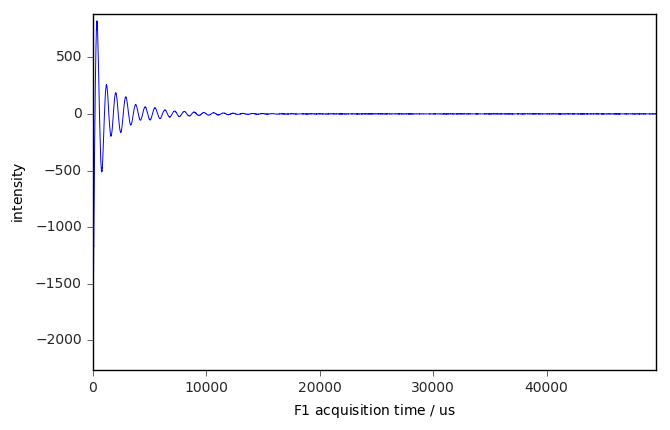

In [69]:
# view it...
_ = ndd.plot(color='blue')

name,NDDataset_bb792b34
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:23.339867
DATA,
title,intensity
values,RR[[ 0.06219 0.1467 ... 0.04565 0.03068] [-0.05969 -0.08752 ... -0.05134 -0.05994] ... [ 0 0 ... 0 0] [ 0 0 ... 0 0]] RI[[ 0.2238 0.1985 ... 0.1662 -0.03262] [0.006566 -0.0282 ... 0.02949 0.06717] ... [ -0 -0 ... -0 -0] [ -0 -0 ... -0 -0]] IR[[-0.003312 -0.001535 ... 0.02067 -0.08058] [-0.05685 0.1174 ... 0.05831 -0.003414] ... [ 0 0 ... 0 0] [ 0 0 ... 0 0]] II[[ 0.1623 0.0563 ... -0.02654 0.01094] [ -0.1344 0.006515 ... 0.08239 -0.00516] ... [ -0 -0 ... -0 -0] [ -0 -0 ... -0 -0]]
shape,"(y:96(complex), x:948(complex))"
DIMENSION `x`,
size,948
title,F2 acquisition time
coordinates,[ 0 48 ... 4.541e+04 4.546e+04] us


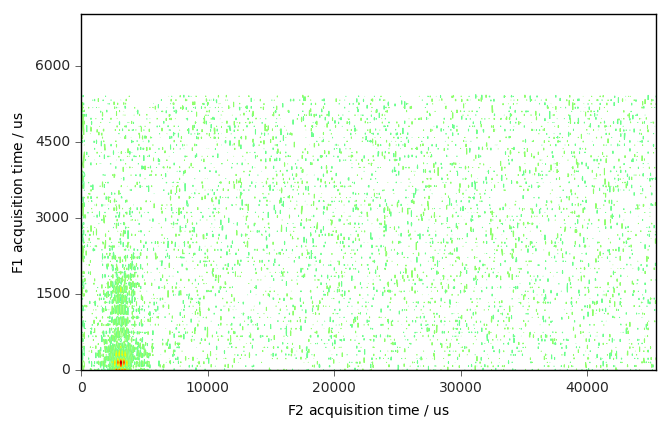

In [70]:
path = os.path.join(datadir, 'nmrdata', 'bruker', 'tests', 'nmr', 'bruker_2d')

# load the data directly (no need to create the dataset first)
ndd2 = NDDataset.read_bruker_nmr(path, expno=1, remove_digital_filter=True)

# view it...
ndd2.x.to('s')
ndd2.y.to('ms')

ax = ndd2.plot(method='map')
ndd2

### IR data

In [71]:
dataset = NDDataset.read_omnic(os.path.join(datadir, 'irdata', 'NH4Y-activation.SPG'))
dataset

name,NH4Y-activation.SPG
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:24.346883
description,"Dataset from spg file : NH4Y-activation.SPG History of the 1st spectrum: vz0521.spa, Thu Jul 07 06:10:41 2016 (GMT+02:00)"
history,2019-03-20 19:05:24.339400:read from spg file
DATA,
title,Absorbance
values,[[ 2.057 2.061 ... 2.013 2.012] [ 2.033 2.037 ... 1.913 1.911] ... [ 1.794 1.791 ... 1.198 1.198] [ 1.816 1.815 ... 1.24 1.238]] a.u.
shape,"(y:55, x:5549)"
DIMENSION `x`,
size,5549


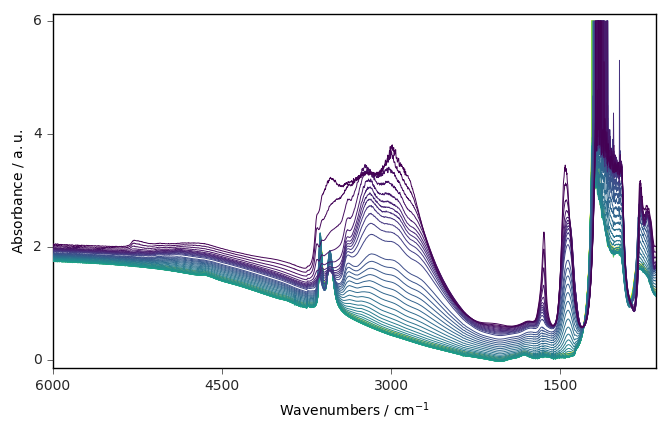

In [72]:
ax = dataset.plot(method='stack')

## Masks

if we try to get for example the maximum of the previous dataset, we face a problem due to the saturation around 1100 cm$^{-1}$.

In [73]:
dataset.max()

name,NH4Y-activation.SPG
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:24.346883
description,"Dataset from spg file : NH4Y-activation.SPG History of the 1st spectrum: vz0521.spa, Thu Jul 07 06:10:41 2016 (GMT+02:00)"
history,2019-03-20 19:05:24.339400:read from spg file
DATA,
title,Absorbance
values,[[ 6]] a.u.
shape,"(y:1, x:1)"
DIMENSION `x`,
size,1


One way is to apply the max function to only a part of the spectrum. Another way is to mask the undesired data.

Masking values in a dataset is straigthforward. Just set a value `masked` or True for those data you want to mask.

In [74]:
dataset[1290.:890.] = MASKED

Now the max function return the  correct position 

In [75]:
dataset.max().x

size,1
title,Wavenumbers
coordinates,[ 1186] cm^-1


Here is a display the figure with the new mask

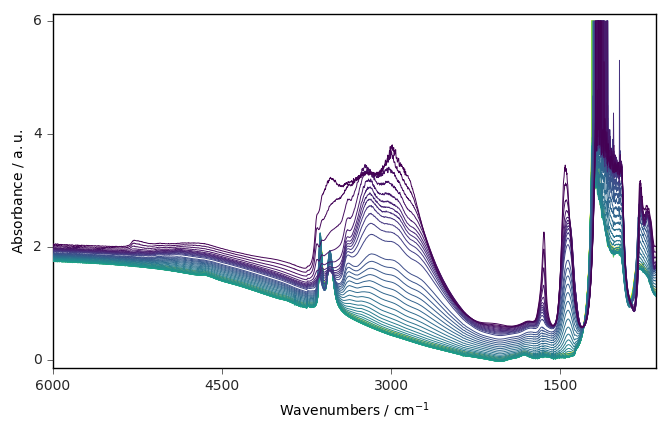

In [76]:
_ = dataset.plot_stack()

## Transposition

Dataset can be transposed

In [77]:
datasetT = dataset.T
datasetT

name,NH4Y-activation.SPG
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:24.346883
description,"Dataset from spg file : NH4Y-activation.SPG History of the 1st spectrum: vz0521.spa, Thu Jul 07 06:10:41 2016 (GMT+02:00)"
history,2019-03-20 19:05:24.339400:read from spg file
DATA,
title,Absorbance
values,[[ 2.057 2.033 ... 1.794 1.816] [ 2.061 2.037 ... 1.791 1.815] ... [ 2.013 1.913 ... 1.198 1.24] [ 2.012 1.911 ... 1.198 1.238]] a.u.
shape,"(x:5549, y:55)"
DIMENSION `x`,
size,5549


As it can be observed the dimension `x`and `y`have been exchanged, *e.g.* the originalshape was **(x:5549, y:55)**, and after transposition it is **(y:55, x:5549)**.
(the dimension names stay the same, but the index of the corresponding axis are exchanged).

Let's vizualize the result:

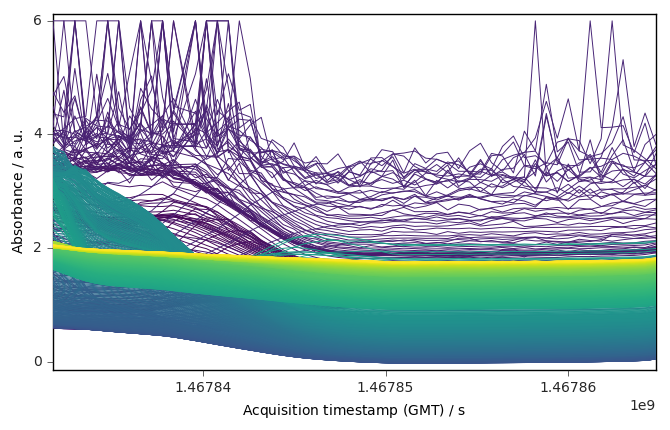

In [78]:
_ = datasetT.plot()

In [79]:
dataset[:, 4000.:3000.], datasetT[4000.:3000.]

(NDDataset: [float32] a.u. (shape: (y:55, x:1038)),
 NDDataset: [float32] a.u. (shape: (x:1038, y:55)))

## Units


Spectrochempy can do calculations with units - it uses [pint](https://pint.readthedocs.io) to define and perform operation on data with units.

### Create quantities

* to create quantity, use for instance, one of the following expression:

In [80]:
Quantity('10.0 cm^-1')

10.0 <Unit('1 / centimeter')>

In [81]:
Quantity(1.0, 'cm^-1/hour')

1.0 <Unit('1 / centimeter / hour')>

In [82]:
Quantity(10.0, ur.cm / ur.km)

10.0 <Unit('centimeter / kilometer')>

or may be (?) simpler,

In [83]:
10.0 * ur.meter / ur.gram / ur.volt

10.0 <Unit('meter / gram / volt')>

`ur` stands for **unit registry**, which handle many type of units
(and conversion between them)

### Do arithmetics with units

In [84]:
a = 900 * ur.km
b = 4.5 * ur.hours
a / b

200.0 <Unit('kilometer / hour')>

Such calculations can also be done using the following syntax, using a string expression

In [85]:
Quantity("900 km / (8 hours)")

112.5 <Unit('kilometer / hour')>

### Convert between units

In [86]:
c = a / b
c.to('cm/s')

5555.555555555556 <Unit('centimeter / second')>

We can make the conversion *inplace* using *ito* instead of *to*

In [87]:
c.ito('m/s')
c

55.55555555555556 <Unit('meter / second')>

### Do math operations with consistent units

In [88]:
x = 10 * ur.radians
np.sin(x)

-0.5440211108893699 <Unit('dimensionless')>

Consistency of the units are checked!

In [89]:
x = 10 * ur.meters
np.sqrt(x)

3.1622776601683795 <Unit('meter ** 0.5')>

but this is wrong...

In [90]:
x = 10 * ur.meters
try:
    np.cos(x)
except DimensionalityError as e:
    error_(e)

[SpectroChemPy] ERROR | Cannot convert from 'meter' to 'radian'


Units can be set for NDDataset data and/or Coordinates

In [91]:
ds = NDDataset([1., 2., 3.], units='g/cm^3', title='concentration')
ds

name,NDDataset_be769862
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:28.708425
DATA,
title,concentration
values,[ 1 2 3] g.cm^-3
size,3


In [92]:
ds.to('kg/m^3')

name,NDDataset_be790668
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:28.708425
DATA,
title,concentration
values,[ 1000 2000 3000] kg.m^-3
size,3


In [93]:
Quantity(10.0, 'cm').plus_minus(.2)

<Measurement(10.00, 0.20, centimeter)>

## Numpy universal functions (ufunc's)

A numpy universal function (or `numpy.ufunc` for short) is a function that
operates on `numpy.ndarray` in an element-by-element fashion. It's
vectorized and so rather fast.

As SpectroChemPy NDDataset imitate the behaviour of numpy objects, many numpy
ufuncs can be applied directly.

For example, if you need all the elements of a NDDataset to be changed to the
squared rooted values, you can use the `numpy.sqrt` function:

In [94]:
da = NDDataset([1., 2., 3.])
da_sqrt = np.sqrt(da)
da_sqrt

name,NDDataset_be801f06
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:28.765828
history,ufunc sqrt applied.
DATA,
title,
values,[ 1 1.414 1.732]
size,3


### Ufuncs with NDDataset with units

When NDDataset have units, some restrictions apply on the use of ufuncs:

Some function functions accept only dimensionless quantities. This is the
case for example of logarithmic functions: :`exp` and `log`.

In [95]:
np.log10(da)

name,NDDataset_be8345e4
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:28.765828
history,ufunc log10 applied.
DATA,
title,
values,[ 0 0.301 0.4771]
size,3


In [96]:
da.units = ur.cm

try:
    np.log10(da)
except DimensionalityError as e:
    error_(e)

[SpectroChemPy] ERROR | Cannot convert from 'centimeter' ([length]) to 'dimensionless' (dimensionless)


## Complex or hypercomplex NDDatasets


NDDataset objects with complex data are handled differently than in
`numpy.ndarray`.

Instead, complex data are stored by interlacing the real and imaginary part.
This allows the definition of data that can be complex in several axis, and *e
.g.,* allows 2D-hypercomplex array that can be transposed (useful for NMR data).

In [97]:
da = NDDataset([[1. + 2.j, 2. + 0j], [1.3 + 2.j, 2. + 0.5j], [1. + 4.2j, 2. + 3j], [5. + 4.2j, 2. + 3j]])
da

name,NDDataset_be89e586
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:28.832710
DATA,
title,
values,R[[ 1 2] [ 1.3 2] [ 1 2] [ 5 2]] I[[ 2 0] [ 2 0.5] [ 4.2 3] [ 4.2 3]]
shape,"(y:4, x:2(complex))"


A dataset of type float can be transformed into a complex dataset (using two cionsecutive rows to create a complex row)

In [98]:
da = NDDataset(np.arange(40).reshape(10,4))
da

name,NDDataset_be8d4198
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:28.857989
DATA,
title,
values,[[ 0 1 2 3] [ 4 5 6 7] ... [ 32 33 34 35] [ 36 37 38 39]]
shape,"(y:10, x:4)"


In [99]:
dac = da.set_complex()
dac

name,NDDataset_be8f32c8
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:28.857989
DATA,
title,
values,R[[ 0 2] [ 4 6] ... [ 32 34] [ 36 38]] I[[ 1 3] [ 5 7] ... [ 33 35] [ 37 39]]
shape,"(y:10, x:2(complex))"


Note the `x`dimension size is divided by a factor of two 

A dataset which is complex in two dimensions is called hypercomplex (it's datatype in SpectroChemPy is set to quaternion). 

In [100]:
daq = da.set_quaternion()   # equivalently one can use the set_hypercomplex method
daq

name,NDDataset_be928afe
author,spectrocat@cf-macbookpro.home
created,2019-03-20 19:05:28.857989
DATA,
title,
values,RR[[ 0 2] [ 8 10] ... [ 24 26] [ 32 34]] RI[[ 1 3] [ 9 11] ... [ 25 27] [ 33 35]] IR[[ 4 6] [ 12 14] ... [ 28 30] [ 36 38]] II[[ 5 7] [ 13 15] ... [ 29 31] [ 37 39]]
shape,"(y:5(complex), x:2(complex))"


In [101]:
daq.dtype

dtype(quaternion)